# REST

* [REST](#REST)
* [API design](#API-design)
* [Rate limiting](#Rate-limiting)
* [Documentation](#Documentation)


#### Goal

* объяснить, что такое REST; 
* разобраться с лучшими практиками реализации RESTful приложений;
* обсудить подходы к документированию и лимитированию запросов к  API;

## REST

#### Origins

__SOAP__

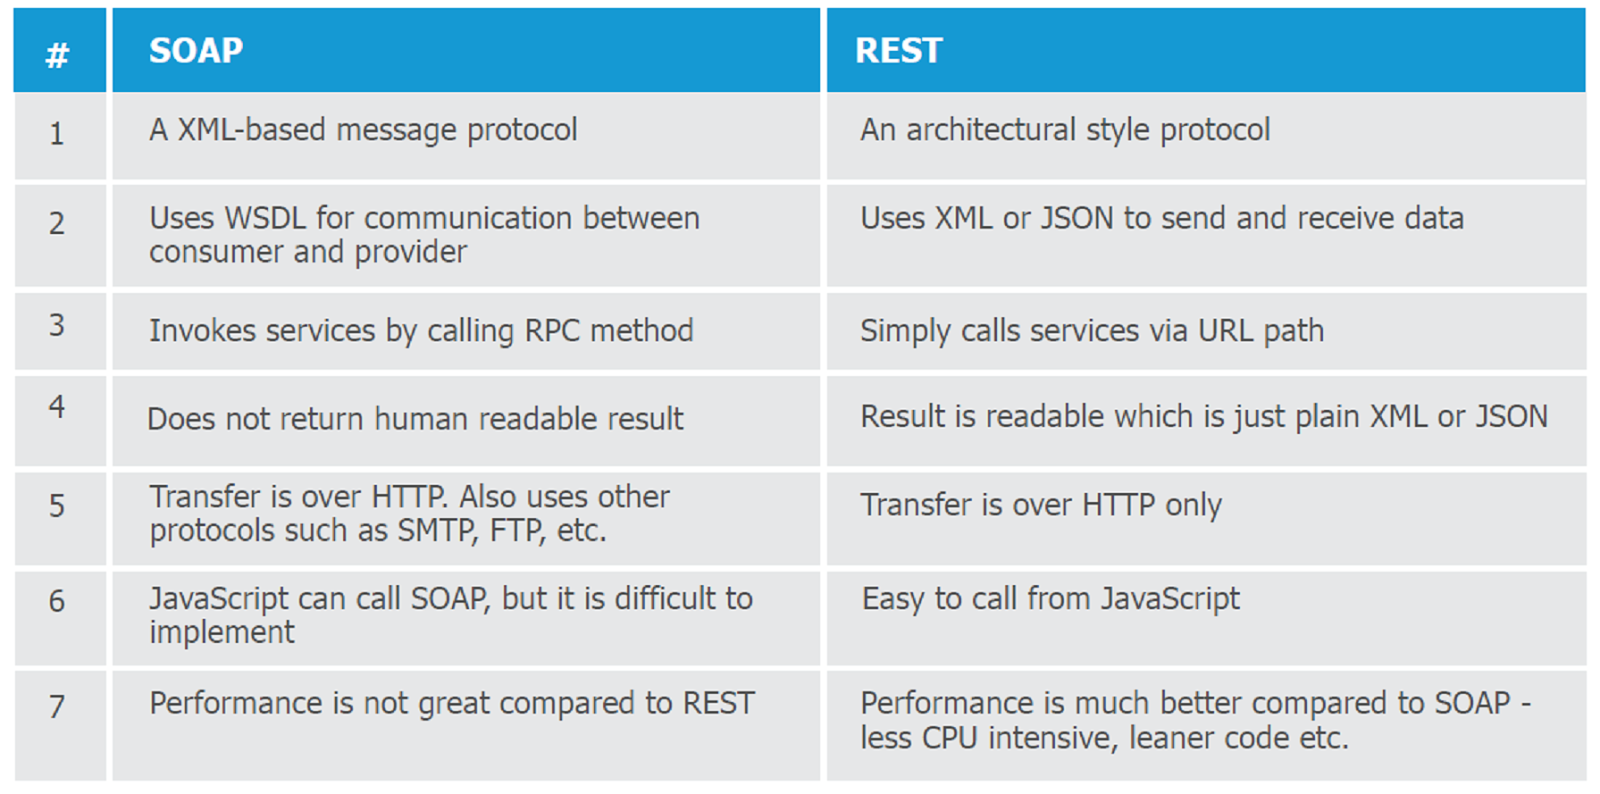

Request

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>
<SOAP-ENV:Envelope
 xmlns:SOAP-ENV="http://schemas.xmlsoap.org/soap/envelope"
 xmlns:ns1="http://rpc.geocoder.us/Geo/Coder/US/"
 xmlns:xsd="http://www.w3.org/2001/XMLSchema"
 xmlns:xsl="http://www.w3.org/2001/XMLSchema-instance"
 xmlns:SOAP-ENC="http://schemas.xmlsoap.org/soap/encoding/"
 SOAP-ENV:encodingStyle="http://schemas.xmlsoap.org/soap/encoding/">
<SOAP-ENV:Body>
 <ns1:geocode>
   <location xsl:type="xsd:string">1600 Pennsylvania Av, Washington, DC</location>
 </ns1:geocode>
</SOAP-ENV:Body>
</SOAP-ENV:Envelope>

Response

In [ ]:
<?xml version="1.0" encoding="UTF-8"?>
<soap:Envelope 
 xmlns:xsl="http://www.w3.org/2001/XMLSchema-instance"
 xmlns:soapenc="http://schemas.xmlsoap.org/soap/encoding/"
 xmlns:xsd="http://www.w3.org/2001/XMLSchema"
 soap:encodingStyle="http://schemas.xmlsoap.org/soap/encoding/"
 xmlns:soap="http://schemas.xmlsoap.org/soap/envelope/"
>
<soap:Body>
 <geocodeREspose xmlns="http://rpc.geocoder.us/Geo/Coder/US/">
 <geo:results soapenc:arrayType="geo:GeocoderAddressResult[1]"
  xsl:type="soapenc:Array"
  xmlns:geo="http://rpc.geocoder.us/Geo/Coder/US/">
 <geo:item xsl:type="geo:GeocoderAddressResult" xmlns:geo="http://rpc.geocoder.us/Geo/Coder/US/"> 
   <geo:number xsl:type="xsd:int">1600</geo:number>
   <geo:lat xsl:type="xsd:float">38.898748</geo:lat>
   <geo:street xsl:type="xsd:string">Pensylvania</geo:street>
   <geo:state xsl:type="xsd:string">DC</geo:state>
   <geo:city xsl:type="xsd:string">Washington</geo:city>
   <geo:zip xsl:type="xsd:int">20502</geo:zip>
   <geo:suffix xsl:type="xsd:string">NW</geo:suffix>
   <geo:long xsl:type="xsd:float">-77.037684</geo:long>
   <geo:type xsl:type="xsd:string">Ave</geo:type>
   <geo:prefix xsl:type="xsd:string">
 </geo:item>
</geo:results>
</geocodeResponse>
</soap:Body>
</soap:Envelope>

__Evolution__

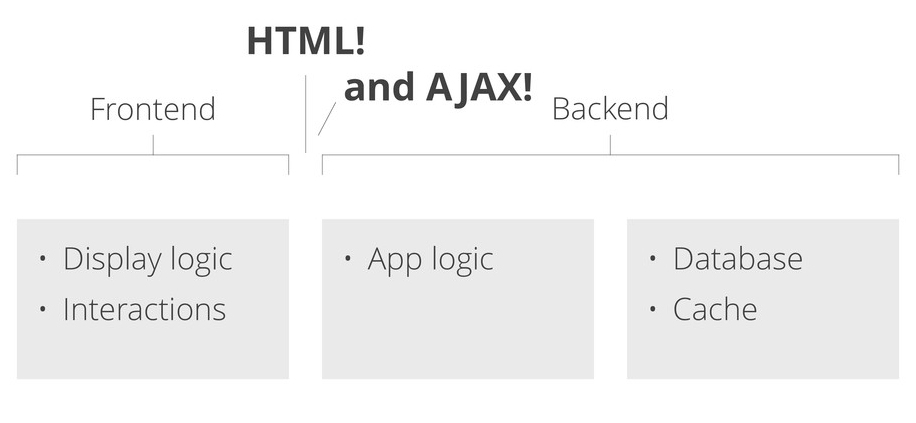

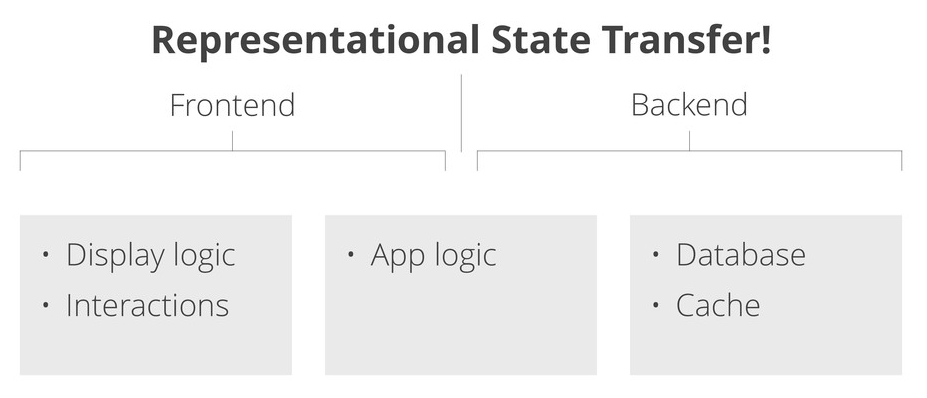

#### Architectural style

Many operations and many kinds of data and a fixed number of “instances” (essentially, as many as you have services)

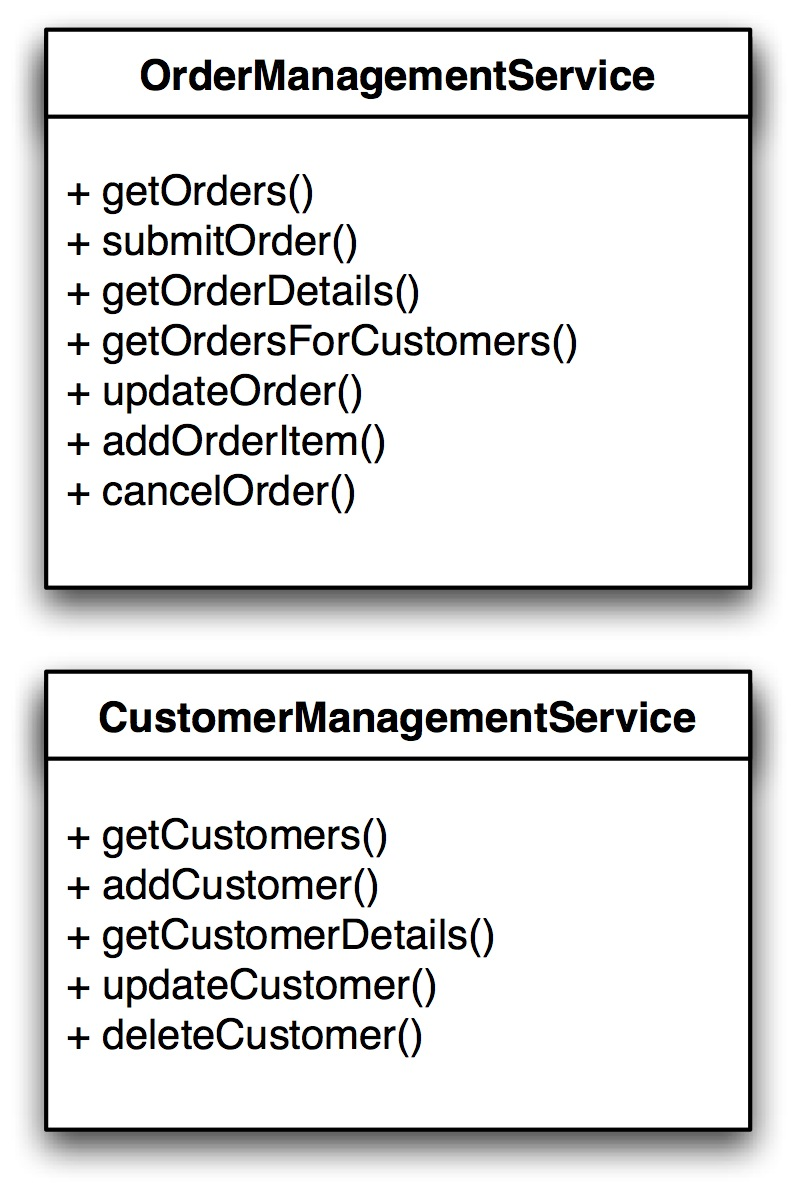

Fixed number of operations, many kinds of data and many objects to invoke those fixed methods upon

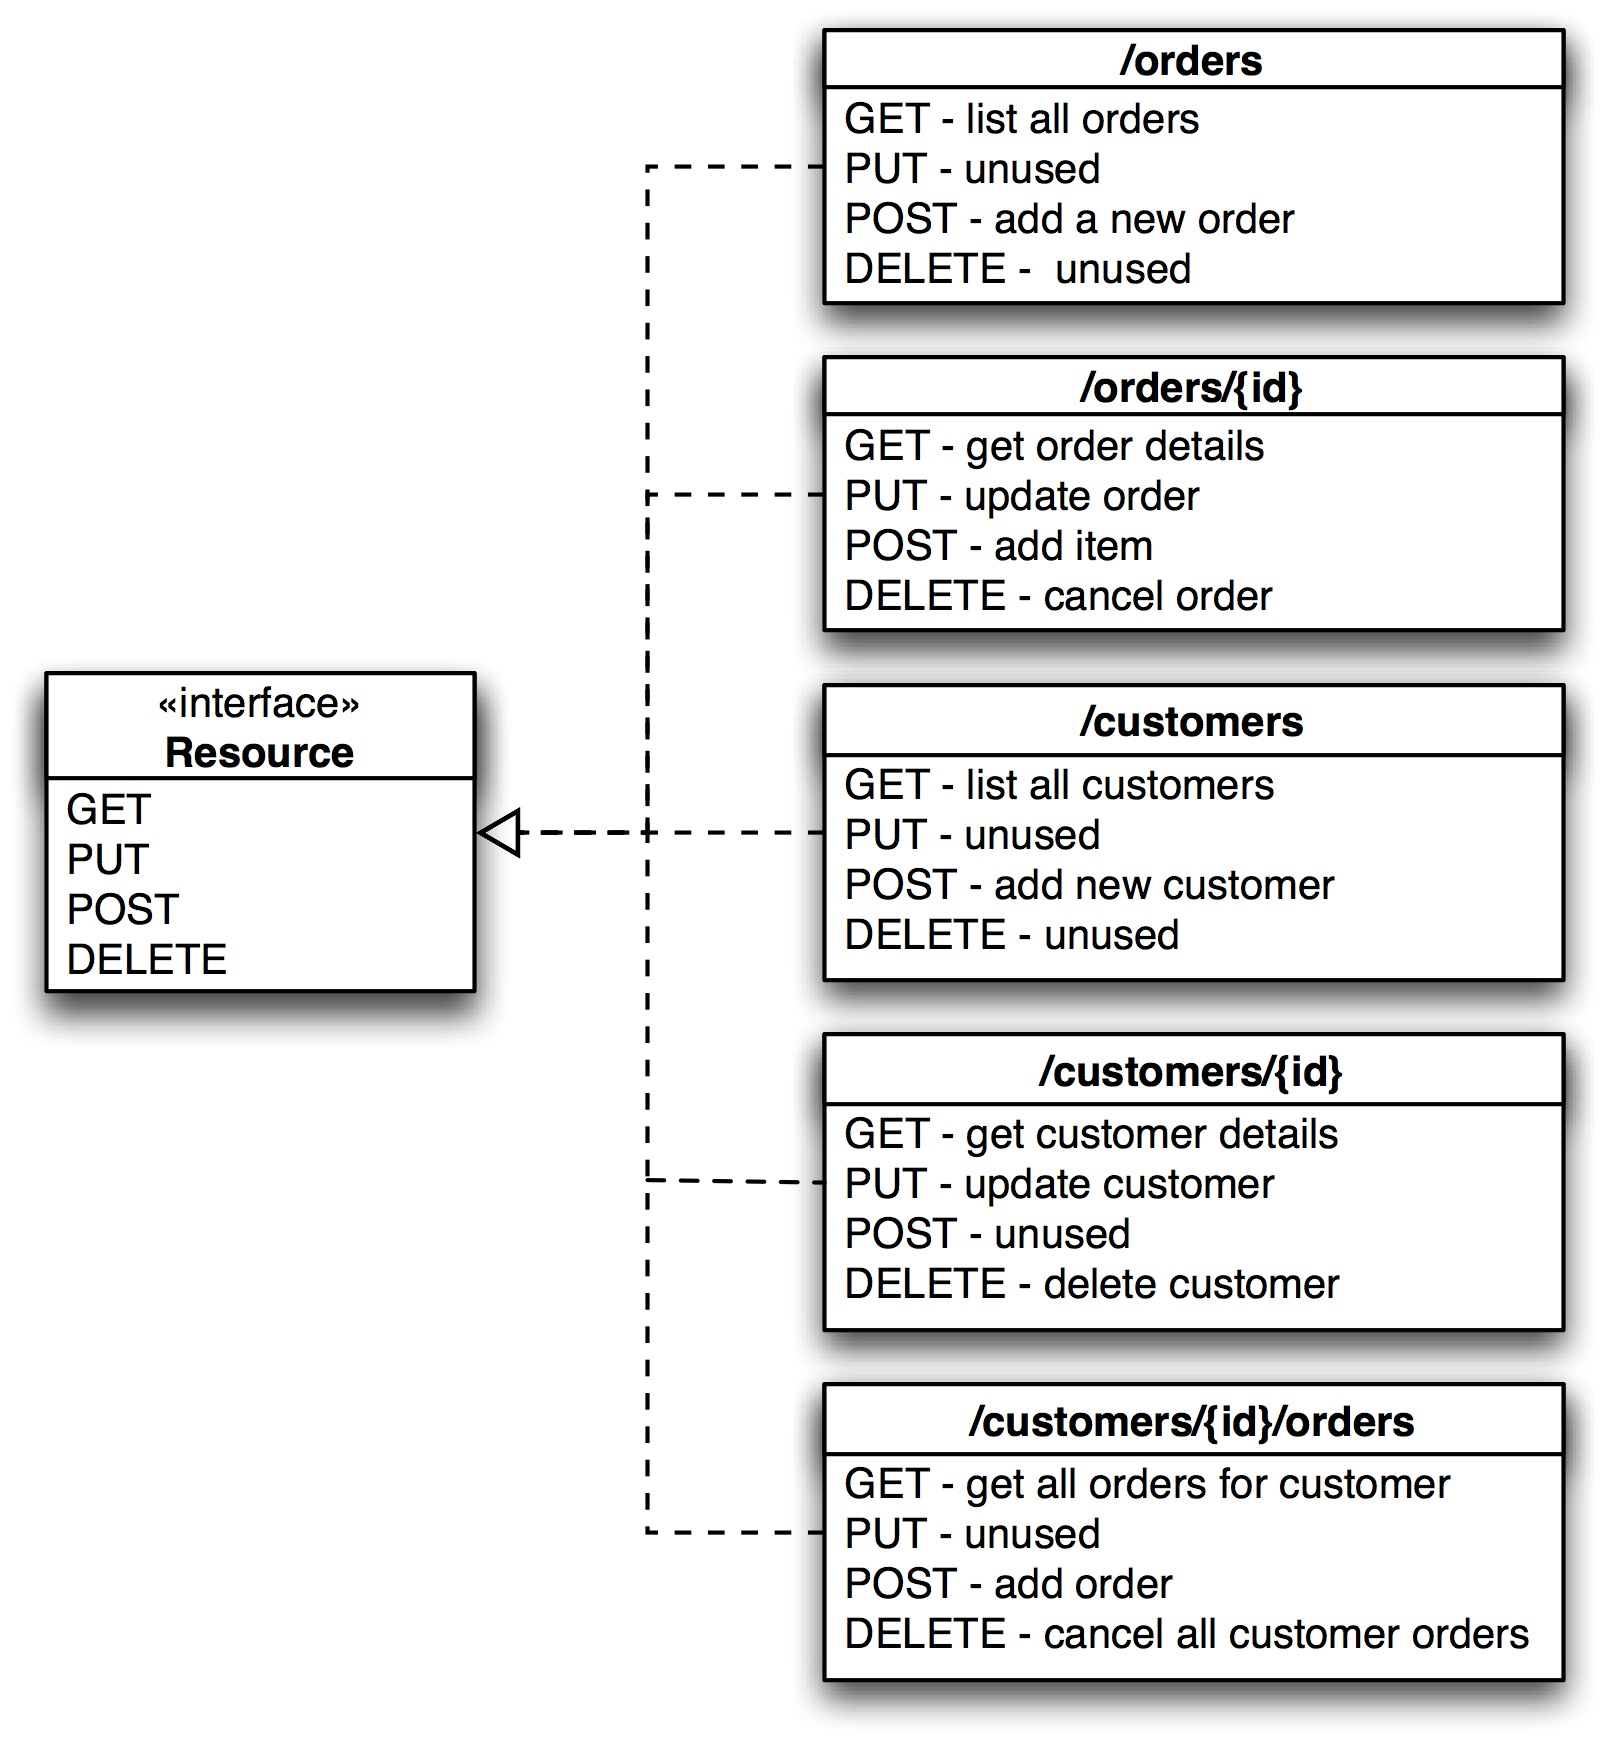

Architectural styles — high-level, abstract patterns that express the core ideas behind an architectural approach. Each architectural style comes with a set of constraints that define it. Examples of architectural styles include the “null style” (which has no constrains at all), pipe and filter, client/server and REST.

#### Constraints

__Code on demand__
* Optional
* Clients can recieve executable code to run intheir context
* Not very practical
    * API don't know client capabilities

__Client-Server__

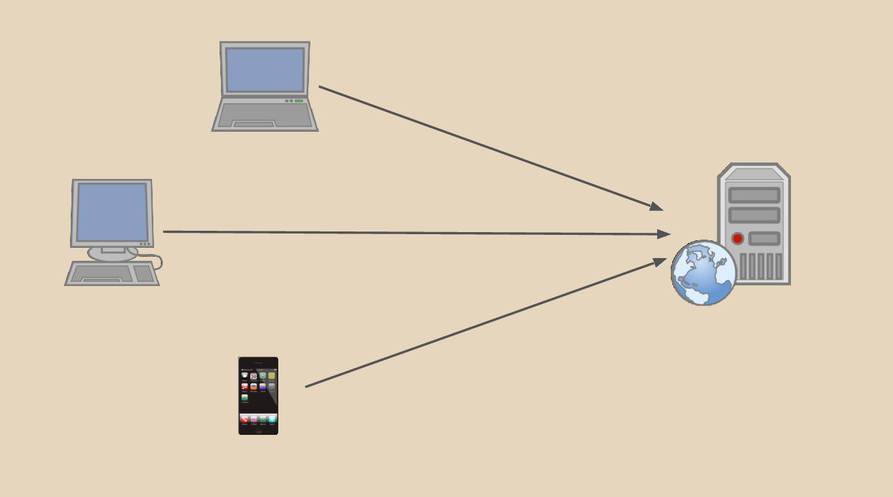

__Layered system__

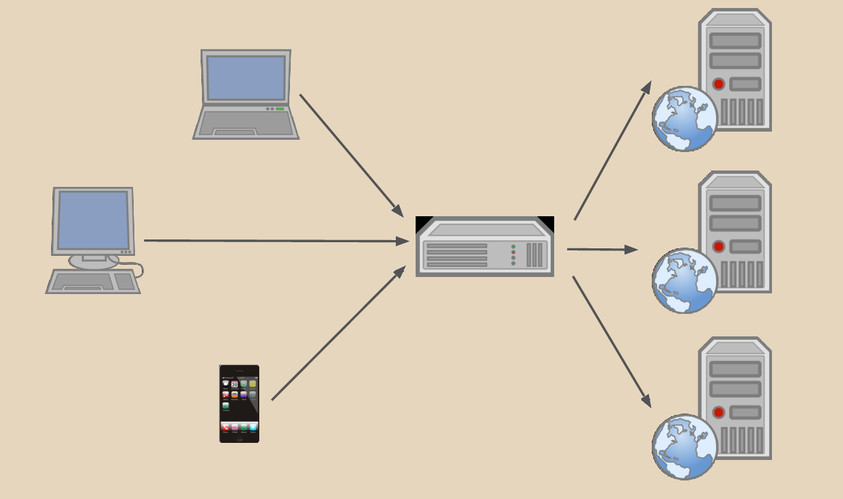

__Cache__

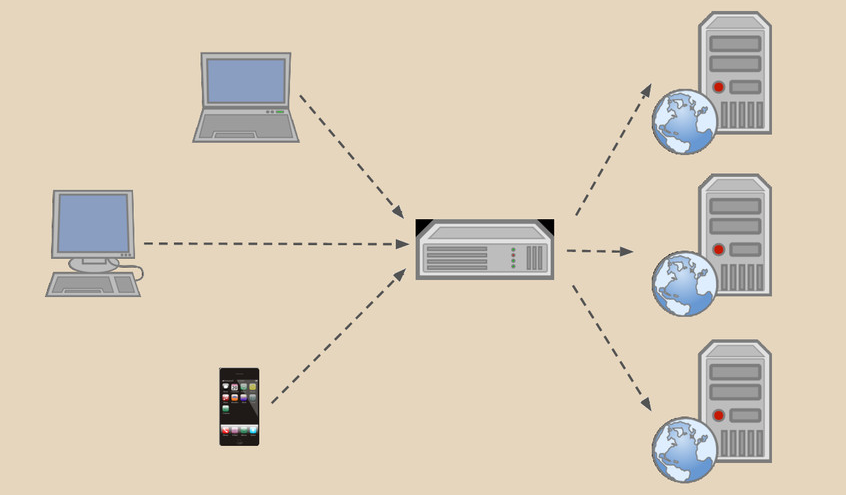

__Stateless__
* Sessions make scaling difficult
* No cookies
* Clients authenticate on every request
    * always HTTPS

__Uniform interface__

Identification of resources
* *Resources* are all the entities in application domain
* Each resource have unique URL
    * http://example.com/orders/2007/10/776654
* Collections of resources also have identifiers
    * http://example.com/customers/

Resource representation
* Clients do not have direct access to resource; they see representations
* Server provides representations in different formats
* Clients perform actions on representations

Self-descriptive messages
* Operations is given in the request method
* Target resource is request URL
* Authentications headers provide credentials
* Content-type(server)/Accept(client) headers define media types
* Resource representation in body
* Operations result is response status code

HATEOAS (Hypermedia as the Engine of Application State)
* Client don't know any resource URLs  in advance except for the root URL
* Resources discovered through links in representations

### References

* https://en.wikipedia.org/wiki/SOAP
* https://habrahabr.ru/post/187390/
* https://www.infoq.com/articles/rest-introduction
* https://www.ics.uci.edu/~fielding/pubs/dissertation/rest_arch_style.htm
* https://en.wikipedia.org/wiki/Hypermedia
* https://github.com/miguelgrinberg/api-pycon2015
* https://htmx.org/essays/how-did-rest-come-to-mean-the-opposite-of-rest/

### Summary

* REST is not a specification or something concrete, it's architectural style
* There are 6 constraints for REST. Uniformity of interface is the hardest to achieve
* API dont have to be fully RESTful. For example, rate limiting is not REST
* HATEOAS is cool, but API still needs documentation

## API design

A REST API is modeled as 
* collections of individually-addressable resources (the __nouns__ of the API). 
* Resources are referenced with their resource names and manipulated via a small set of methods (also known as __verbs__ or operations)

__Design flow__
* Determine what types of resources an API provides.
* Determine the relationships between resources.
* Decide the resource name schemes based on types and relationships.
* Decide the resource schemas.
* Attach minimum set of methods to resources.

#### Resources

A resource-oriented API is generally modeled as a resource hierarchy, where each node is either a 
* simple resource
* collection resource. 
    * collection contains a list of resources of the *same* type. For example, a user has a collection of contacts.

Resource has some state and zero or more sub-resources. Each sub-resource can be either a simple resource or a collection resource.

Gmail collection of users: `users/*`
* collection of messages: `users/{uid}/messages/{mid}`
* collection of threads: `users/*/threads/*`
* collection of labels: `users/*/labels/*`
* collection of change history: `users/*/history/*`
* resource representing the user profile: `users/*/profile`
* resource representing user settings: `users/*/settings`

__Resource names__

Each resource must have its own unique resource name consisting of:
* resource ID
* parent ID
* service name

Resource could be mentioned by its
* full name
    * `//library.googleapis.com/shelves/shelf1/books/book2`
* relative name
    * `shelves/shelf1/books/book2`

#### Types

#### Methods

Typical resource-oriented API exposes a large number of resources with a small number of methods. 
The methods can be either the
* standard methods
* custom methods


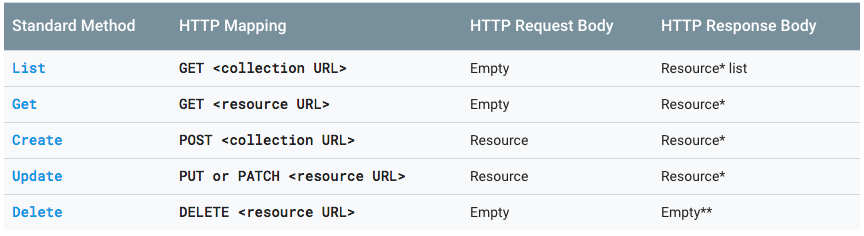

*Note*: If the Update method only supports full resource update, it must use HTTP verb PUT. However, full update is highly discouraged because it has backwards compatibility issues when adding new resource fields.

__Custom methods__

`https://service.name/v1/some/resource/name:customVerb`

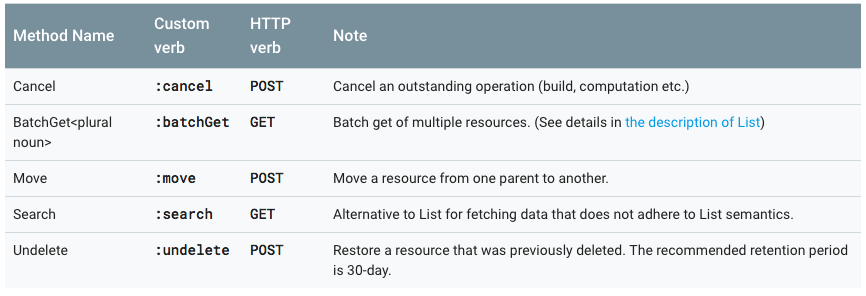

#### Versioning

* For some period of time, different versions of the same API must be able to work at the same time within a single client application
* An older API version should only be removed after its deprecation period is over.

__Backwards-incompatible (breaking) changes__
* Removing or renaming a service, interface, field, method or enum value
* Changing the type of a field
* Changing a resource name format
* Changing visible behavior of existing requests
* Changing the URL format in the HTTP definition
* Adding a read/write field to a resource message

#### Errors

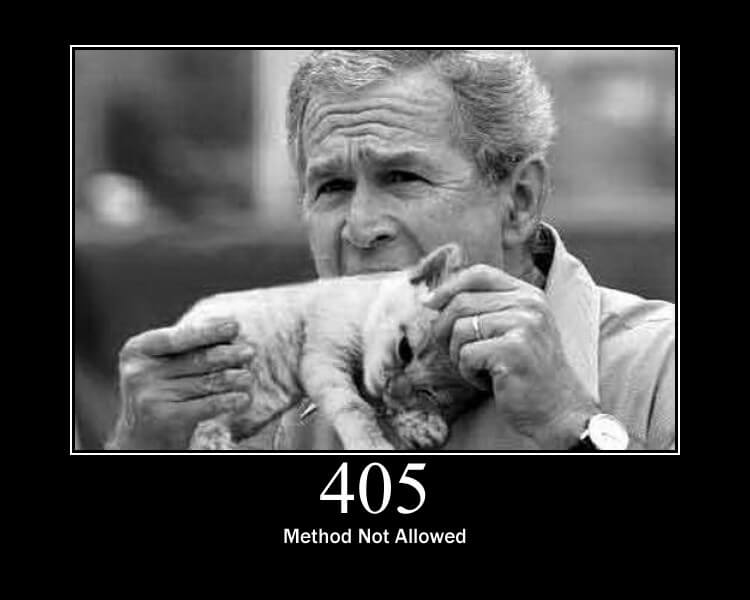

Because APIs use resource-oriented API design, the error handling follows the same design principle by using a small set of standard errors with a large number of resources. 

The smaller state space reduces the complexity of documentation, affords better idiomatic mappings in client libraries, and reduces client logic complexity while not restricting the inclusion of actionable information.

In [ ]:
{
  "error": {
    "code": 401,
    "message": "Request had invalid credentials.",
    "status": "UNAUTHENTICATED",
    "details": [{
      "@type": "type.googleapis.com/google.rpc.RetryInfo",
      ...
    }]
  }
}

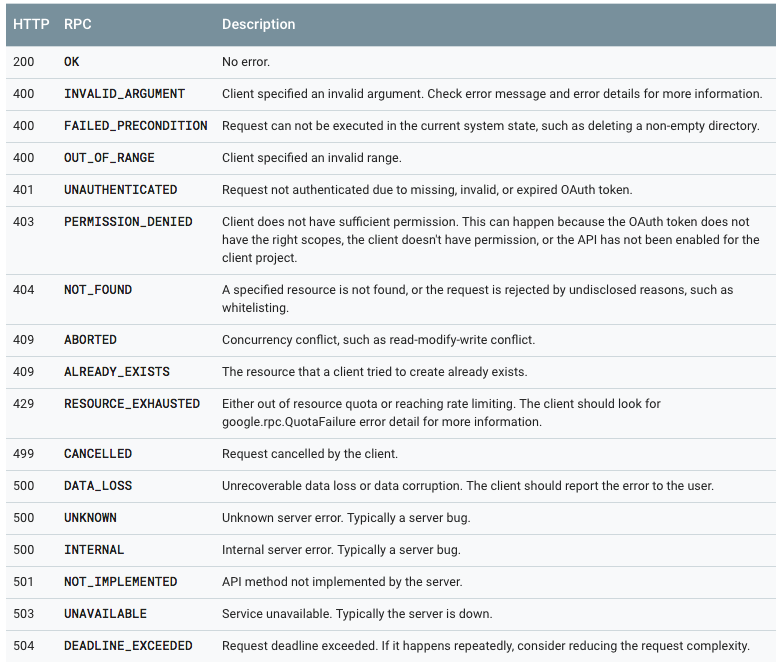

#### Design Patterns

https://cloud.google.com/apis/design/design_patterns

Example: pagination
* request:
    * `page_token`
    * `page_size`
* response
    * data
    * `next_page_token`

### References

* https://cloud.google.com/apis/design/
* https://cloud.google.com/apis/design/design_patterns
* http://restful-api-design.readthedocs.io/en/latest/resources.html
* https://jacobian.org/writing/rest-worst-practices/
* https://www.infoq.com/articles/rest-anti-patterns
* https://www.youtube.com/watch?v=hdSrT4yjS1g
* https://nordicapis.com/a-pragmatic-take-on-rest-anti-patterns/
* https://nordicapis.com/the-three-principles-of-excellent-api-design/
* https://leanpub.com/yourapiisbad/read#leanpub-auto-anatomy-of-an-api
* https://github.com/stickfigure/blog/wiki/How-to-(and-how-not-to)-design-REST-APIs

### Summary

* think twice about every decision

## Rate limiting

__Nginx__

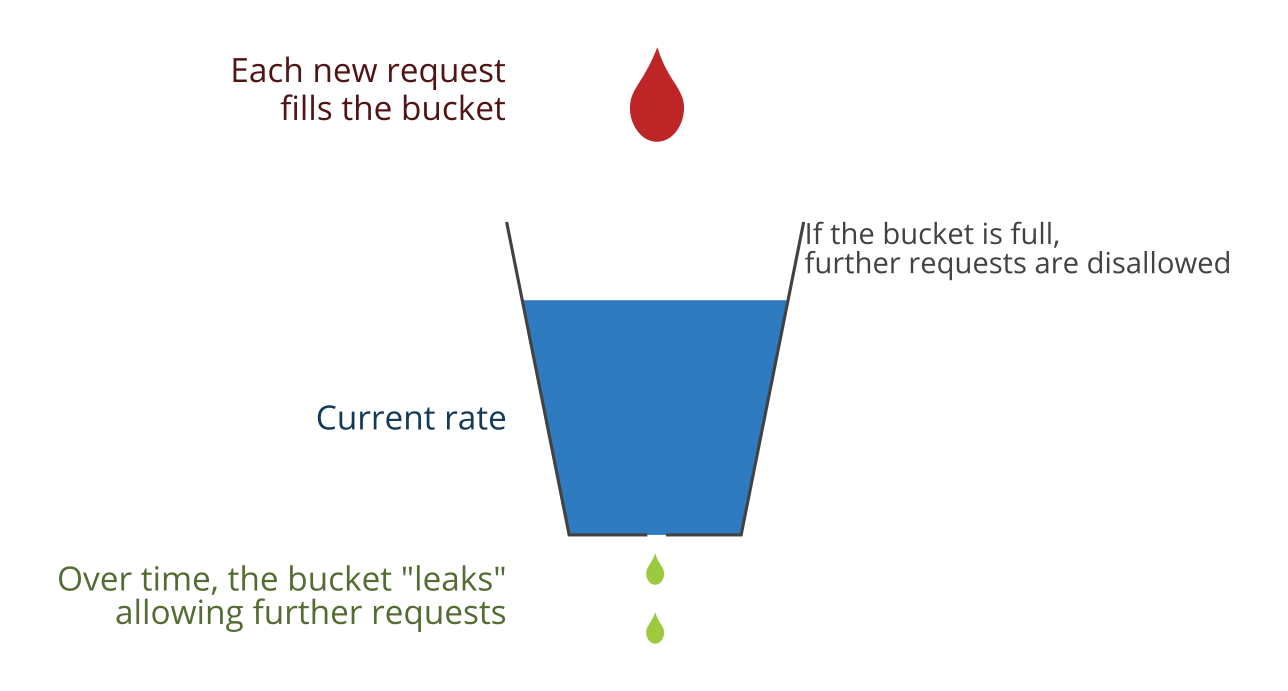

Problem: 
 - if the incoming requests are spread across a large number of servers, this doesn’t work any more

__Cloudflare__

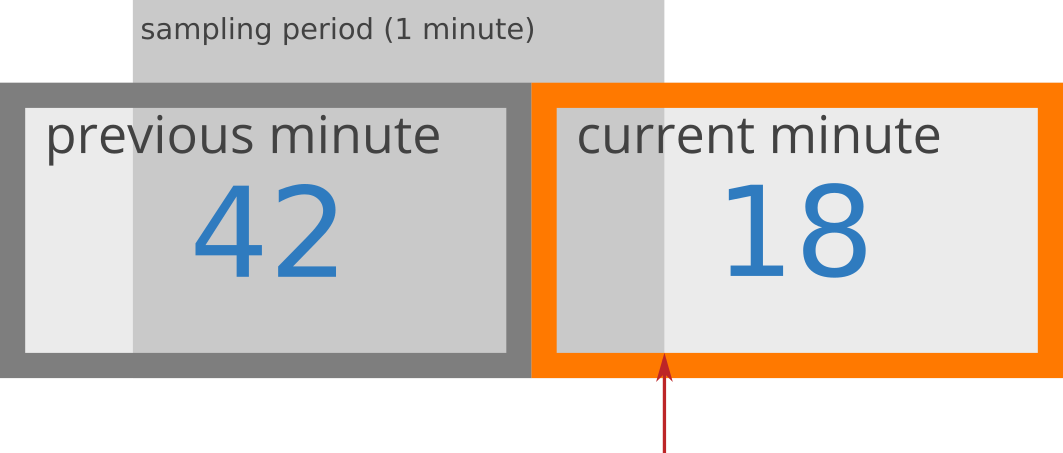

In [ ]:
rate = 42 * ((60-15)/60) + 18  
     = 42 * 0.75 + 18
     = 49.5 requests

__Stripe__

In [ ]:
# How many requests per second do you want a user to be allowed to do?
REPLENISH_RATE = 100

# How much bursting do you want to allow?
CAPACITY = 5 * REPLENISH_RATE

SCRIPT = File.read('request_rate_limiter.lua')

def check_request_rate_limiter(user)
  # Make a unique key per user.
  prefix = 'request_rate_limiter.' + user

  # You need two Redis keys for Token Bucket.
  keys = [prefix + '.tokens', prefix + '.timestamp']

  # The arguments to the LUA script. time() returns unixtime in seconds.
  args = [REPLENISH_RATE, CAPACITY, Time.new.to_i, 1]

  begin
    allowed, tokens_left = redis.eval(SCRIPT, keys, args)
  rescue RedisError => e
    # Fail open. We don't want a hard dependency on Redis to allow traffic.
    # Make sure to set an alert so you know if this is happening too much.
    # Our observed failure rate is 0.01%.
    puts 'Redis failed: ' + e
    return
  end

  if !allowed
    raise RateLimitError.new(status_code = 429)
  end
end

In [ ]:
local tokens_key = KEYS[1]
local timestamp_key = KEYS[2]

local rate = tonumber(ARGV[1])
local capacity = tonumber(ARGV[2])
local now = tonumber(ARGV[3])
local requested = tonumber(ARGV[4])

local fill_time = capacity/rate
local ttl = math.floor(fill_time*2)

local last_tokens = tonumber(redis.call("get", tokens_key))
if last_tokens == nil then
  last_tokens = capacity
end

local last_refreshed = tonumber(redis.call("get", timestamp_key))
if last_refreshed == nil then
  last_refreshed = 0
end

local delta = math.max(0, now-last_refreshed)
local filled_tokens = math.min(capacity, last_tokens+(delta*rate))
local allowed = filled_tokens >= requested
local new_tokens = filled_tokens
if allowed then
  new_tokens = filled_tokens - requested
end

redis.call("setex", tokens_key, ttl, new_tokens)
redis.call("setex", timestamp_key, ttl, now)

return { allowed, new_tokens }

__Github__

__Twitter__

### References

* https://nginx.org/en/docs/http/ngx_http_limit_req_module.html
* https://blog.cloudflare.com/counting-things-a-lot-of-different-things/
* https://blog.figma.com/an-alternative-approach-to-rate-limiting-f8a06cf7c94c?gi=502a91633f8f
* https://stripe.com/blog/rate-limiters
* https://developer.github.com/v3/#rate-limiting
* https://dev.twitter.com/rest/public/rate-limits

### Summary

* API must come with rate limiting
* Rate limiting can be a business plan

## Documentation

* https://github.com/bozaro/tech-db-forum/blob/master/swagger.yml

### References

* https://swagger.io/getting-started/
* http://www.django-rest-framework.org/topics/documenting-your-api/

### Summary

* API without up to date documentation is garbage